<a href="https://colab.research.google.com/github/NRiccieri/HIAAC_Project_Group3/blob/main/Centralized_case_FL_proposta_algoritmo_compressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FL Compression Algorithm**

In this notebook, we train a DNN on a single machine containing all the datasets for training.

This will be used as reference for experiments in training the same DNN model under FL environment. 


In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#create gdrive folder inside content
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#importing dataset to google colab from gdrive
!cp /content/gdrive/MyDrive/kaggle_datasets/archive.zip  /content/archive.zip 

#unzipping 
!unzip archive.zip 

Archive:  archive.zip
  inflating: test.csv                
  inflating: train.csv               


In [4]:
df_train=pd.read_csv('train.csv')

In [5]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
df_train.shape

(7352, 563)

In [8]:
df_train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [9]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

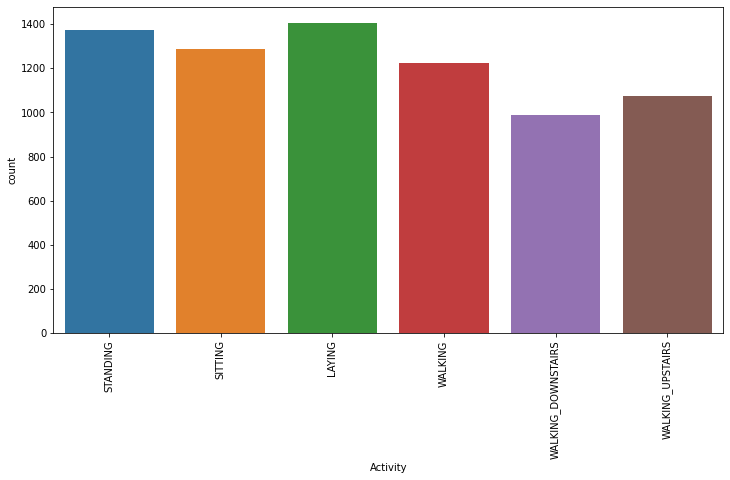

In [10]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=df_train)
plt.xticks(x=df_train['Activity'],rotation='vertical')
plt.show()

In [7]:
df_train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [8]:
x=pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y=df_train.Activity.values.astype(object)

In [9]:
x.shape , y.shape

((7352, 561), (7352,))

In [10]:
df_train.Activity.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

In [11]:
from sklearn import preprocessing

In [12]:
encoder=preprocessing.LabelEncoder()

In [13]:
encoder.fit(y)
y=encoder.transform(y)
print("shape of y: ", y.shape)

print("y[5]=", y[5])

shape of y:  (7352,)
y[5]= 2


In [14]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

**Feature scaling**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=scaler.fit_transform(x)

**Splitting the dataset into training and validation sets**

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=100)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6616, 561), (736, 561), (6616,), (736,))

## **MLP classification in Sklearn**

In [18]:
from sklearn.neural_network import MLPClassifier

In [32]:
import time
start = time.time()

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1, max_iter=500)
clf.fit(X_train, y_train)

end = time.time()

print(end - start)

58.75421738624573


In [33]:
y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9850543478260869

## **MLP in Tensorflow**

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [36]:
model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(561,), name="inputlayer"),
    
    # dense layer 1
    Dense(256, activation='sigmoid', name="firstlayer"),  
    
    # dense layer 2
    Dense(256, activation='sigmoid', name="secondlayer"), 

    # dense layer 3
    Dense(256, activation='sigmoid', name="thirdlayer"), 
    
    # output layer
    Dense(6, activation='sigmoid', name="outputlayer"),  
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
import time
start = time.time()

model.fit(x, y, epochs=120, 
          validation_split=0.15)

end = time.time()
print("training time = ", end - start)

Epoch 1/120
196/196 [==============================] - 1s 5ms/step - loss: 1.7736 - accuracy: 0.2082 - val_loss: 1.7530 - val_accuracy: 0.1859
Epoch 2/120
196/196 [==============================] - 1s 4ms/step - loss: 1.7168 - accuracy: 0.2687 - val_loss: 1.6864 - val_accuracy: 0.3309
Epoch 3/120
196/196 [==============================] - 1s 4ms/step - loss: 1.6353 - accuracy: 0.3631 - val_loss: 1.5919 - val_accuracy: 0.3345
Epoch 4/120
196/196 [==============================] - 1s 4ms/step - loss: 1.5043 - accuracy: 0.4029 - val_loss: 1.4269 - val_accuracy: 0.3345
Epoch 5/120
196/196 [==============================] - 1s 4ms/step - loss: 1.3463 - accuracy: 0.4271 - val_loss: 1.2862 - val_accuracy: 0.3382
Epoch 6/120
196/196 [==============================] - 1s 4ms/step - loss: 1.2284 - accuracy: 0.4265 - val_loss: 1.1942 - val_accuracy: 0.3345
Epoch 7/120
196/196 [==============================] - 1s 4ms/step - loss: 1.1623 - accuracy: 0.4375 - val_loss: 1.1468 - val_accuracy: 0.4814

## **Conclusion**

We use TensorFlow to implement an MLP classifier for the Kaggle dataset.

Given the architecture used (3 hidden layers with 256 units), we reach an accuracy score of about 98.5% in 120 epochs. 

The training time is 2 minutes 22 seconds. 